Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Importing Boston Housing Dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df['MEDV'] = boston.target #adding the target column
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum() #count of the null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.describe() #describing the data set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.dtypes #data types

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
df.shape #dimensions

(506, 14)

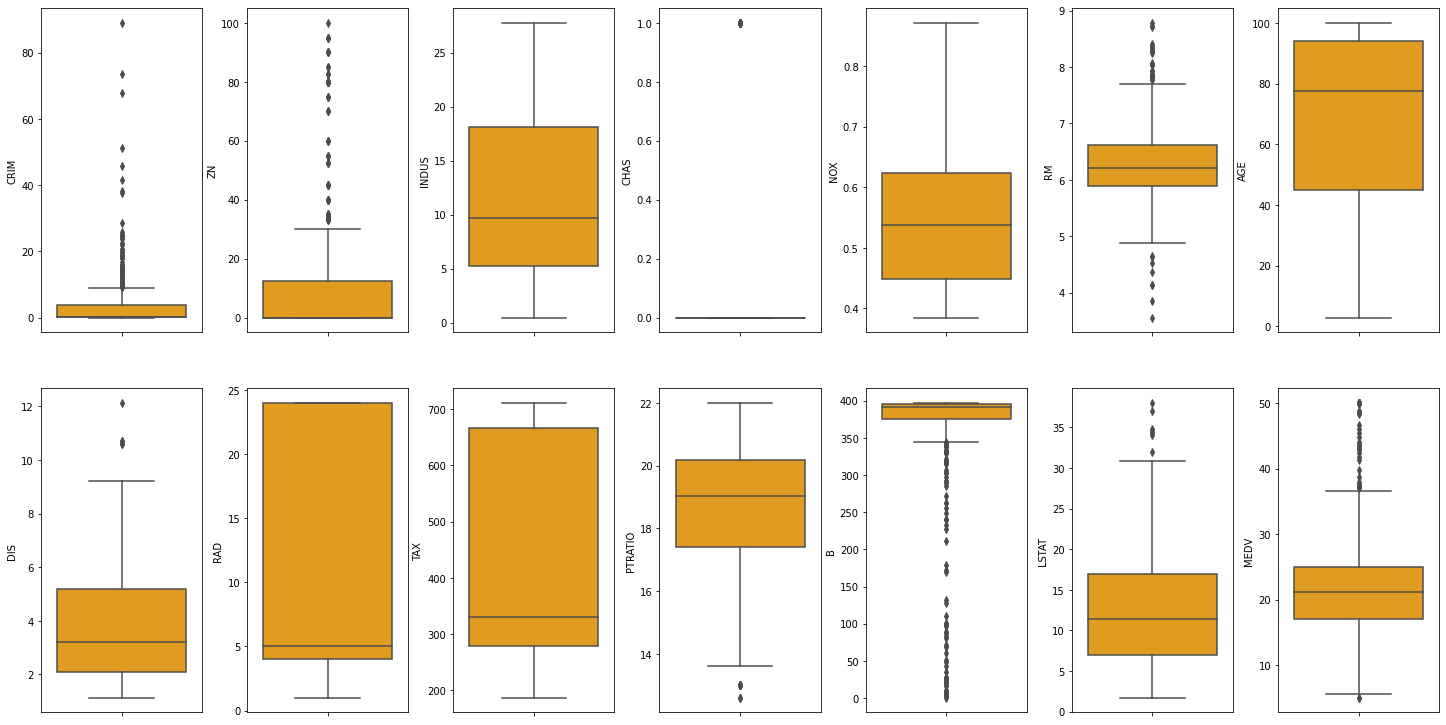

In [9]:
#drawing box plot for visualizing the outliers in the dataset
fig, axis = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axis = axis.flatten()
for col,value in df.items():
    sns.boxplot(y=col, data=df, ax=axis[index],color="orange")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

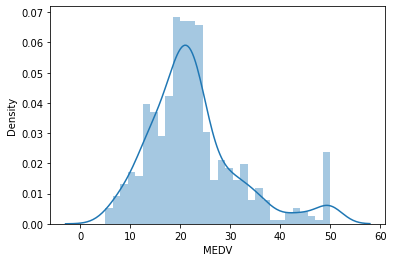

In [10]:
sns.distplot(df['MEDV'], bins=30) #ploting histogram with x axis as MEDV
plt.show()

#### MEDV are distributed normally with few outliers.

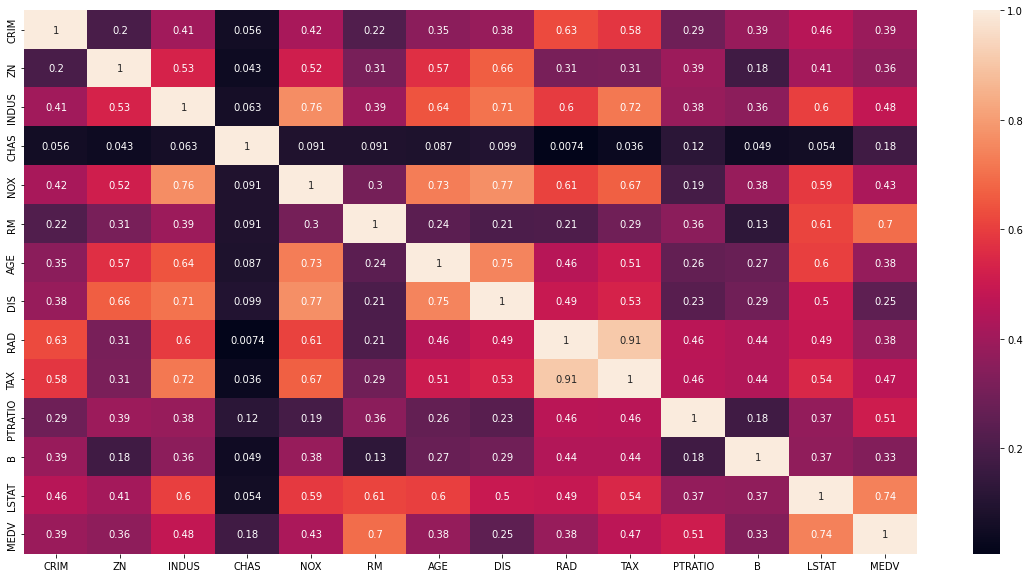

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(), annot=True) #heat map gives you the intution about the correlation between the features
plt.show()

#### RM,LSTAT has a strong  correlation with MEDV 

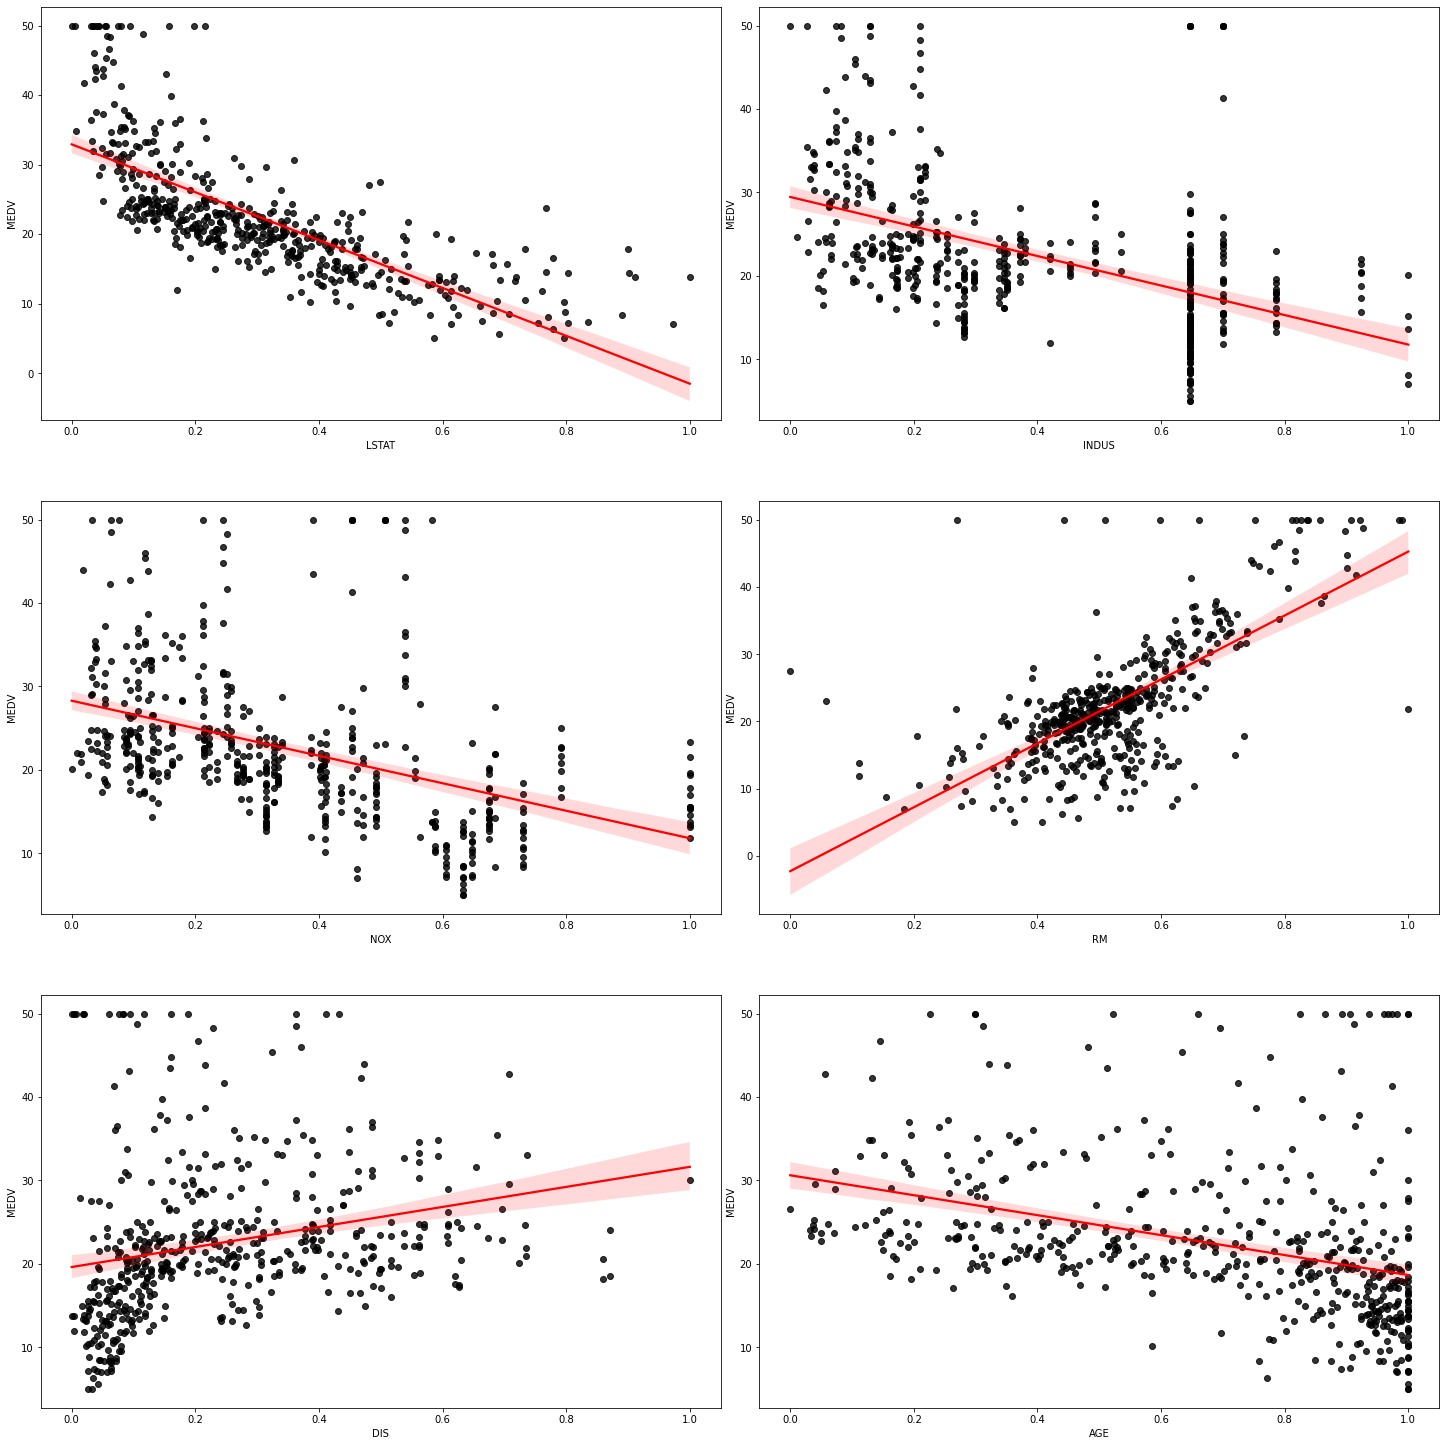

In [12]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() #normalization
column_sels = ['LSTAT', 'INDUS', 'NOX', 'RM', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i],scatter_kws={"color": "black"}, line_kws={"color": "red"}) #creates a regression line between 2 parameters and helps to visualize their linear relationships.
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [13]:
#normalization
cols=['LSTAT','INDUS','PTRATIO','RM','MEDV'];
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[cols])
df[cols] = scaler.transform(df[cols])

In [14]:
#removing the outliers
cols=['LSTAT','INDUS','PTRATIO','RM','MEDV'];
for i in cols:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    Lower=Q1-1.5*IQR
    Upper=Q3+1.5*IQR
    df=df[(df[i]>Lower)&(df[i]<Upper)]

#### Spiliting DataSet

In [15]:
x=df[['LSTAT','INDUS','PTRATIO','RM','TAX']]
y=df['MEDV']

In [16]:
#splitting the dataset 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.3,
                                                    random_state = 42)
  
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (312, 5)
xtest shape  :  (134, 5)
ytrain shape :  (312,)
ytest shape  :  (134,)


#### Creating Linear Regression Model

In [17]:
#creating object of linear regression class
regressor = LinearRegression()
regressor.fit(xtrain, ytrain) #provide the data to the model and fitting it into the object
y_pred = regressor.predict(xtest) #predicting the output on the test data

In [18]:
accuracy=regressor.score(xtest,ytest) #calculating the accuracy with the help of xtest and ytest

In [19]:
accuracy

0.7917703940206632

In [20]:

from sklearn import metrics
print('MAE: %2.4f'%(metrics.mean_absolute_error(ytest, y_pred))) #mean absolute error is the average of all absoulte error
print('MSE:%2.4f'%(metrics.mean_squared_error(ytest, y_pred))) #
print('RMSE:%2.4f'%(np.sqrt(metrics.mean_squared_error(ytest, y_pred))))

MAE: 0.0480
MSE:0.0038
RMSE:0.0616


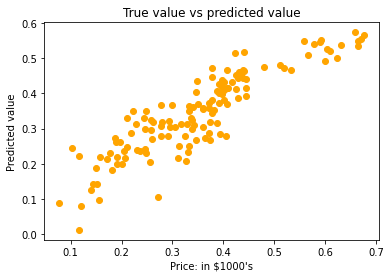

In [21]:
#ploting our data
plt.scatter(ytest, y_pred,color='orange')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value")
plt.show()